2020/04/21

sample info gatherd by `query.TCGAbiokinks.THYM.rawseq.R`



In [92]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats import multitest
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
np.random.seed(100)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
df_cli = pd.read_csv('idep/THYM.clinical.xml.csv', index_col=0)
df_cli.index = df_cli.bcr_patient_barcode
df_cli = df_cli.dropna(subset=['primary_pathology_history_myasthenia_gravis'])
df_cli = df_cli[~df_cli.duplicated()]
df_cli.head()

,bcr_patient_barcode,additional_studies,tissue_source_site,patient_id,bcr_patient_uuid,informed_consent_verified,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,...,stage_event_masaoka_stage,primary_pathology_tumor_tissue_site,primary_pathology_histological_type_list,primary_pathology_initial_pathologic_diagnosis_method,primary_pathology_init_pathology_dx_method_other,primary_pathology_days_to_initial_pathologic_diagnosis,primary_pathology_age_at_initial_pathologic_diagnosis,primary_pathology_year_of_initial_pathologic_diagnosis,primary_pathology_history_myasthenia_gravis,primary_pathology_section_myasthenia_gravis
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O,TCGA-3G-AB0O,NaN,3G,AB0O,3F19D238-1B55-4530-A9E2-8FDA644D45A6,YES,C37.9,8583/3,C37,NO,...,I,Thymus,Thymoma; Type B1,Core needle biopsy,NaN,0.0,47.0,2009,NO,NaN
TCGA-3G-AB0Q,TCGA-3G-AB0Q,NaN,3G,AB0Q,67FF3AA1-9D52-4DC8-8501-ECD0D37A8735,YES,C37.9,8581/3,C37,NO,...,IIa,Thymus,Thymoma; Type A,Fine needle aspiration biopsy,NaN,0.0,66.0,2009,NO,NaN
TCGA-3G-AB0T,TCGA-3G-AB0T,NaN,3G,AB0T,ACAAED1A-2667-4C56-919B-DAF5574371BB,YES,C37.9,8583/3,C37,NO,...,IIb,Anterior Mediastinum,Thymoma; Type B1,Clamshell Sternectomy,NaN,0.0,45.0,2000,NO,NaN
TCGA-3G-AB19,TCGA-3G-AB19,NaN,3G,AB19,81FDC97F-8BAD-4286-9D36-9A887C6B59A1,YES,C37.9,8581/3,C37,NO,...,IIb,Thymus,Thymoma; Type A,Fine needle aspiration biopsy,NaN,0.0,76.0,2006,YES,NaN
TCGA-3Q-A9WF,TCGA-3Q-A9WF,NaN,3Q,A9WF,FBC5DEBD-F117-4ADE-81B0-45D49FDD50A1,YES,C37.9,8584/3,C37,NO,...,I,Thymus,Thymoma; Type B2,Median Sternectomy,NaN,0.0,71.0,2013,NO,NaN


In [3]:
df_sample = pd.read_csv('TCGA-THYM-rawseq.csv', index_col=0)
df_sample.head()

,data_release,md5sum,data_format,file_name,file_id,experimental_strategy,data_category,access,submitter_id,created_datetime,...,file_size,data_type,project,short_name,center_namespace,center_center_id,center_code,center_center_type,center_name,tissue.definition
1,0.0 - 23.0,7e6362b6901e3a60dbae07318c977707,FASTQ,UNCID_2641702.b1f45874-aafd-44c9-81f8-99a3bff0...,d891bca1-0323-4277-baf7-6f505377ea45,RNA-Seq,Raw sequencing data,controlled,40dc6872-6ee6-4dd5-ad36-0ef5a9699237,NaN,...,6035125454,Unaligned reads,TCGA-THYM,UNC,unc.edu,ee7a85b3-8177-5d60-a10c-51180eb9009c,7,CGCC,University of North Carolina,Primary solid Tumor
2,0.0 - 23.0,71f6fd300e85419eca16d22b70326ca0,FASTQ,UNCID_2647319.8ced943b-3651-491b-8f4c-059f711d...,afaef14f-81b6-493f-89bc-a689f699ad66,RNA-Seq,Raw sequencing data,controlled,334986f8-21de-46c0-8a7b-2fa9aa47c10e,NaN,...,6567663281,Unaligned reads,TCGA-THYM,UNC,unc.edu,ee7a85b3-8177-5d60-a10c-51180eb9009c,7,CGCC,University of North Carolina,Primary solid Tumor
3,0.0 - 23.0,988ec03fd8117b78adb7ba375f89c4f6,FASTQ,UNCID_2642283.b6c024db-6aee-4642-b30e-eeb5d3a3...,bb2707b0-f108-4076-a0aa-f10385bb41cb,RNA-Seq,Raw sequencing data,controlled,94df8814-72e4-401f-b98d-c928ccebb98f,NaN,...,6339735506,Unaligned reads,TCGA-THYM,UNC,unc.edu,ee7a85b3-8177-5d60-a10c-51180eb9009c,7,CGCC,University of North Carolina,Primary solid Tumor
4,0.0 - 23.0,d5952fecfb73fccd2eec8f6d9f0284e2,FASTQ,UNCID_2641599.c2c8115c-d6a3-407d-ae15-00acc6c9...,ba15fa9a-ce07-46a9-a42c-d33ab54b4cbf,RNA-Seq,Raw sequencing data,controlled,1d128e94-64a6-4252-a3d9-a0149ae2c960,NaN,...,4845867499,Unaligned reads,TCGA-THYM,UNC,unc.edu,ee7a85b3-8177-5d60-a10c-51180eb9009c,7,CGCC,University of North Carolina,Primary solid Tumor
5,0.0 - 23.0,e5c4db777be14e18bf45c732d4e2f99b,FASTQ,UNCID_2641561.b40f1b02-122f-4f06-85c4-ac3caca0...,1816cf84-8daf-4cc9-ad93-f3c5439082e7,RNA-Seq,Raw sequencing data,controlled,d1a07b6b-1b6d-486a-8c7d-92480ccf7631,NaN,...,5337998153,Unaligned reads,TCGA-THYM,UNC,unc.edu,ee7a85b3-8177-5d60-a10c-51180eb9009c,7,CGCC,University of North Carolina,Primary solid Tumor


In [4]:
df_sample['bcr_patient_barcode'] = [x[:12] for x in df_sample.cases]

In [5]:
df_cli = pd.merge(df_cli.reset_index(drop=True), df_sample, on='bcr_patient_barcode')

In [6]:
import os

In [7]:
list_files = [x for x in os.listdir('arcasHLA/') if x.endswith('.csv')]

In [8]:
df_cli = df_cli[df_cli['file_id'].isin([x.split('.')[0] for x in list_files])]

In [9]:
list_d = []
for pos,row in df_cli.iterrows():
    s = row['file_id']
    d = pd.read_csv('arcasHLA/{}.csv'.format(s))
    d['MG'] = row['primary_pathology_history_myasthenia_gravis']
    d['bcr_patient_barcode'] = row['bcr_patient_barcode']
    list_d.append(d)

In [10]:
df_hla = pd.concat(list_d, axis=0)
df_hla.head()

,Locus,Major Allele,Minor Allele,Major Allele count,Minor Allele count,minor/major,MG,bcr_patient_barcode
0,A,A*68:02:01,A*03:02:01,235.0,65.0,0.276596,NO,TCGA-3G-AB0O
1,B,B*40:05,B*07:02:01,89.0,50.0,0.561798,NO,TCGA-3G-AB0O
2,C,C*07:02:01,NaN,9682.0,NaN,NaN,NO,TCGA-3G-AB0O
3,DPB1,DPB1*11:01:01,DPB1*398:01,510.0,108.0,0.211765,NO,TCGA-3G-AB0O
4,DQA1,DQA1*01:01:01,NaN,1677.0,NaN,NaN,NO,TCGA-3G-AB0O


In [66]:
df_hla['Major_aa'] = df_hla['Major Allele'].str.split(':').str.get(0)  + ':' \
        + df_hla['Major Allele'].str.split(':').str.get(1)

df_hla['Minor_aa'] = df_hla['Minor Allele'].str.split(':').str.get(0)  + ':' \
        + df_hla['Minor Allele'].str.split(':').str.get(1)

df_hla['Major_group'] = df_hla['Major Allele'].str.split(':').str.get(0)

df_hla['Minor_group'] = df_hla['Minor Allele'].str.split(':').str.get(0) 

In [205]:
list_mj = []
list_all = []
for l in ['A', 'B', 'C', 'DQA1', 'DQB1', 'DRB1']:
    d = df_hla[df_hla['Locus'] == l]
    d_cr_mj = pd.crosstab(d['Major_aa'], d['MG'])
    d_cr_all = pd.crosstab(pd.concat([d['Major_aa'], d['Minor_aa']]), 
                           pd.concat([d['MG'], d['MG']]))   
    
    for pos, row in d_cr_mj.iterrows():
        oddsratio, pvalue = stats.fisher_exact([[row['YES'], row['NO']], 
                                        [d_cr_mj.loc[d_cr_mj.index != pos].sum()['YES'],
                                                 d_cr_mj.loc[d_cr_mj.index != pos].sum()['NO']]])
       
        if row['YES'] > row['NO']:
            sym = '+'
        else:
            sym = '-'
            
        list_mj.append([l, pos, oddsratio, pvalue, sym])
        
    for pos, row in d_cr_all.iterrows():
        oddsratio, pvalue = stats.fisher_exact([[row['YES'], row['NO']], 
                                        [d_cr_all.loc[d_cr_all.index != pos].sum()['YES'],
                                        d_cr_all.loc[d_cr_all.index != pos].sum()['NO']]])
        
        if row['YES'] > row['NO']:
            sym = '+'
        else:
            sym = '-'
                    
        list_all.append([l, pos, oddsratio, pvalue, sym])
        
df_mj = pd.DataFrame(list_mj, columns=['Locus', 'Allele', 'odds', 'p', 'symbol'])
df_mj['fdr'] = multitest.fdrcorrection(df_mj['p'])[1]
df_mj['-logp'] = -np.log10(df_mj['p'])
df_all = pd.DataFrame(list_all, columns=['Locus', 'Allele', 'odds', 'p', 'symbol'])
df_all['fdr'] = multitest.fdrcorrection(df_all['p'])[1]
df_all['-logp'] = -np.log10(df_all['p'])

In [206]:
df_mj[df_mj['p'] < 0.1]

,Locus,Allele,odds,p,symbol,fdr,-logp
11,A,A*24:02,2.845850,0.058360,-,1.0,1.233885
36,B,B*27:05,inf,0.082670,+,1.0,1.082651
69,C,C*03:04,inf,0.082670,+,1.0,1.082651
94,DQA1,DQA1*01:04,4.425287,0.050078,+,1.0,1.300352
107,DQB1,DQB1*05:03,4.252874,0.055992,+,1.0,1.251874


In [207]:
df_all[df_all['p'] < 0.1]

,Locus,Allele,odds,p,symbol,fdr,-logp
55,B,B*27:05,inf,0.072317,+,1.0,1.140761
100,C,C*03:04,inf,0.084279,+,1.0,1.074279
117,C,C*07:67,inf,0.084279,+,1.0,1.074279
146,DQB1,DQB1*05:01,0.393773,0.080771,-,1.0,1.092743


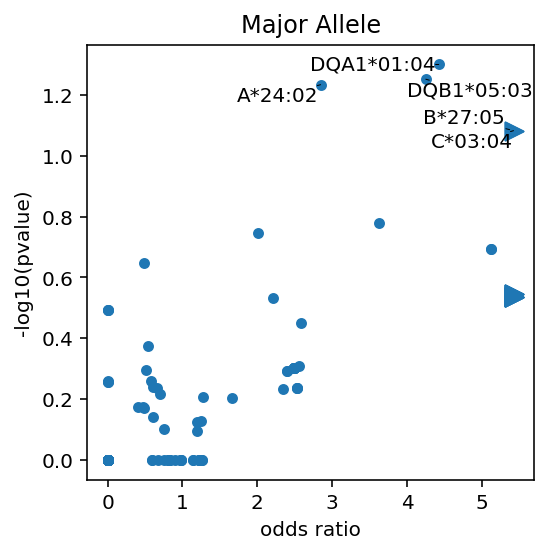

In [210]:
d_p = df_mj.copy()
# d_p.plot.scatter(x='odds', y='-logp')
d_p['marker'] = '.'
if d_p.odds.max() == np.inf:
    x_max = d_p.loc[d_p.odds != np.inf, 'odds'].max()
    x_min = d_p.loc[d_p.odds != np.inf, 'odds'].min()
    
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '+'), 'marker'] = '>'
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '+'), 'odds'] = x_max + 0.3
    
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '-'), 'marker'] = '<'
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '-'), 'odds'] = x_min - 0.3
    
    d_p.loc[(d_p.odds == -np.inf) & (d_p.symbol == '-'), 'marker'] = '<'
    d_p.loc[(d_p.odds == -np.inf) & (d_p.symbol == '-'), 'odds'] = x_min - 0.3
    
plt.figure(figsize=(4,4))
for pos,row in d_p.iterrows():
    plt.scatter(row['odds'], row['-logp'], marker=row['marker'], s=80, color='tab:blue')
plt.xlabel('odds ratio')
plt.ylabel('-log10(pvalue)')
plt.title('Major Allele')
# texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
texts = [plt.text(row['odds'], row['-logp'], row['Allele']) 
         for pos,row in d_p[d_p['p'] < 0.1].iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.savefig('plots/arcasHLA/Major_aa.pdf', bbox_inches='tight')

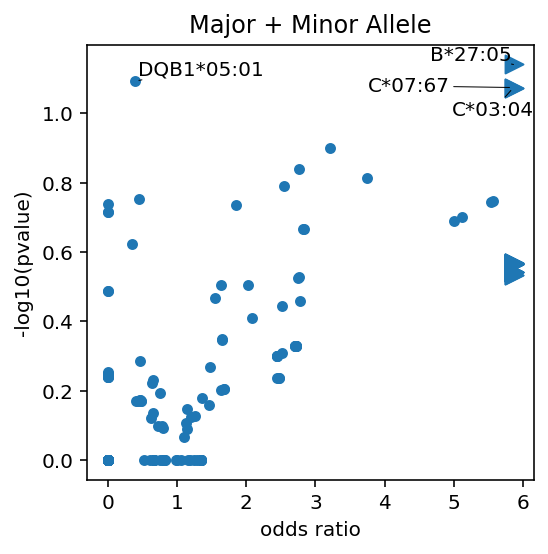

In [211]:
d_p = df_all.copy()
# d_p.plot.scatter(x='odds', y='-logp')
d_p['marker'] = '.'
if d_p.odds.max() == np.inf:
    x_max = d_p.loc[d_p.odds != np.inf, 'odds'].max()
    x_min = d_p.loc[d_p.odds != np.inf, 'odds'].min()
    
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '+'), 'marker'] = '>'
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '+'), 'odds'] = x_max + 0.3
    
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '-'), 'marker'] = '<'
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '-'), 'odds'] = x_min - 0.3
    
    d_p.loc[(d_p.odds == -np.inf) & (d_p.symbol == '-'), 'marker'] = '<'
    d_p.loc[(d_p.odds == -np.inf) & (d_p.symbol == '-'), 'odds'] = x_min - 0.3
    
plt.figure(figsize=(4,4))
for pos,row in d_p.iterrows():
    plt.scatter(row['odds'], row['-logp'], marker=row['marker'], s=80, color='tab:blue')
plt.xlabel('odds ratio')
plt.ylabel('-log10(pvalue)')
plt.title('Major + Minor Allele')
# texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
texts = [plt.text(row['odds'], row['-logp'], row['Allele']) 
         for pos,row in d_p[d_p['p'] < 0.1].iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.savefig('plots/arcasHLA/MajorMinor_aa.pdf', bbox_inches='tight')

In [212]:
list_mj = []
list_all = []
for l in ['A', 'B', 'C', 'DQA1', 'DQB1', 'DRB1']:
    d = df_hla[df_hla['Locus'] == l]
    d_cr_mj = pd.crosstab(d['Major_group'], d['MG'])
    d_cr_all = pd.crosstab(pd.concat([d['Major_group'], d['Minor_group']]), 
                           pd.concat([d['MG'], d['MG']]))   
    
    for pos, row in d_cr_mj.iterrows():
        oddsratio, pvalue = stats.fisher_exact([[row['YES'], row['NO']], 
                                        [d_cr_mj.loc[d_cr_mj.index != pos].sum()['YES'],
                                         d_cr_mj.loc[d_cr_mj.index != pos].sum()['NO']]])
        if row['YES'] > row['NO']:
            sym = '+'
        else:
            sym = '-'
            
        list_mj.append([l, pos, oddsratio, pvalue, sym])
        
    for pos, row in d_cr_all.iterrows():
        oddsratio, pvalue = stats.fisher_exact([[row['YES'], row['NO']], 
                                        [d_cr_all.loc[d_cr_all.index != pos].sum()['YES'],
                                        d_cr_all.loc[d_cr_all.index != pos].sum()['NO']]])

        if row['YES'] > row['NO']:
            sym = '+'
        else:
            sym = '-'
            
        list_all.append([l, pos, oddsratio, pvalue, sym])

df_mj = pd.DataFrame(list_mj, columns=['Locus', 'Allele', 'odds', 'p', 'symbol'])
df_mj['fdr'] = multitest.fdrcorrection(df_mj['p'])[1]
df_mj['-logp'] = -np.log10(df_mj['p'])
df_all = pd.DataFrame(list_all, columns=['Locus', 'Allele', 'odds', 'p', 'symbol'])
df_all['fdr'] = multitest.fdrcorrection(df_all['p'])[1]
df_all['-logp'] = -np.log10(df_all['p'])

In [213]:
df_mj[df_mj['p'] < 0.1]

,Locus,Allele,odds,p,symbol,fdr,-logp
5,A,A*24,2.845850,0.058360,-,1.0,1.233885
23,B,B*40,2.529915,0.089207,-,1.0,1.049603


In [214]:
df_all[df_all['p'] < 0.1]

,Locus,Allele,odds,p,symbol,fdr,-logp
5,A,A*24,2.055556,0.083972,-,1.0,1.075864
64,DRB1,DRB1*08,4.826389,0.035539,+,1.0,1.449294
70,DRB1,DRB1*14,3.497872,0.072827,+,1.0,1.137705


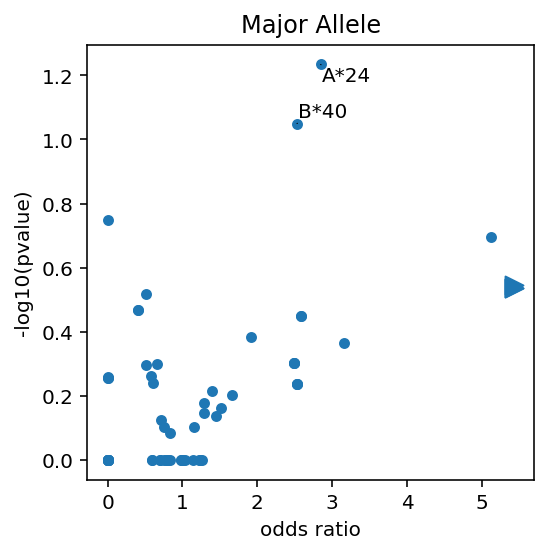

In [215]:
d_p = df_mj.copy()
# d_p.plot.scatter(x='odds', y='-logp')
d_p['marker'] = '.'
if d_p.odds.max() == np.inf:
    x_max = d_p.loc[d_p.odds != np.inf, 'odds'].max()
    x_min = d_p.loc[d_p.odds != np.inf, 'odds'].min()
    
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '+'), 'marker'] = '>'
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '+'), 'odds'] = x_max + 0.3
    
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '-'), 'marker'] = '<'
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '-'), 'odds'] = x_min - 0.3
    
    d_p.loc[(d_p.odds == -np.inf) & (d_p.symbol == '-'), 'marker'] = '<'
    d_p.loc[(d_p.odds == -np.inf) & (d_p.symbol == '-'), 'odds'] = x_min - 0.3
    
plt.figure(figsize=(4,4))
for pos,row in d_p.iterrows():
    plt.scatter(row['odds'], row['-logp'], marker=row['marker'], s=80, color='tab:blue')
plt.xlabel('odds ratio')
plt.ylabel('-log10(pvalue)')
plt.title('Major Allele')
# texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
texts = [plt.text(row['odds'], row['-logp'], row['Allele']) 
         for pos,row in d_p[d_p['p'] < 0.1].iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.savefig('plots/arcasHLA/Major_group.pdf', bbox_inches='tight')

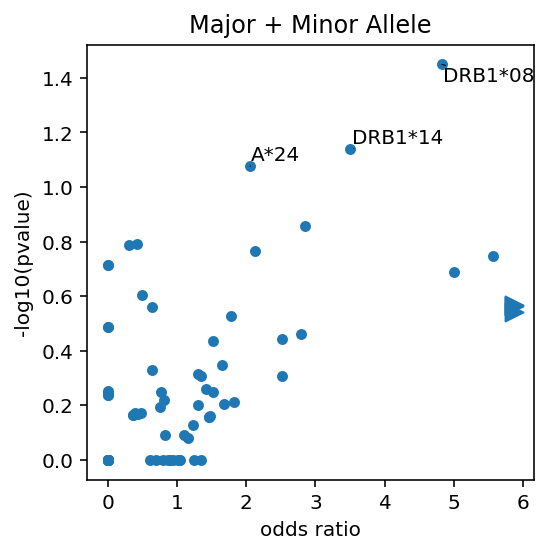

In [216]:
d_p = df_all.copy()
# d_p.plot.scatter(x='odds', y='-logp')
d_p['marker'] = '.'
if d_p.odds.max() == np.inf:
    x_max = d_p.loc[d_p.odds != np.inf, 'odds'].max()
    x_min = d_p.loc[d_p.odds != np.inf, 'odds'].min()
    
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '+'), 'marker'] = '>'
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '+'), 'odds'] = x_max + 0.3
    
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '-'), 'marker'] = '<'
    d_p.loc[(d_p.odds == np.inf) & (d_p.symbol == '-'), 'odds'] = x_min - 0.3
    
    d_p.loc[(d_p.odds == -np.inf) & (d_p.symbol == '-'), 'marker'] = '<'
    d_p.loc[(d_p.odds == -np.inf) & (d_p.symbol == '-'), 'odds'] = x_min - 0.3
    
plt.figure(figsize=(4,4))
for pos,row in d_p.iterrows():
    plt.scatter(row['odds'], row['-logp'], marker=row['marker'], s=80, color='tab:blue')
plt.xlabel('odds ratio')
plt.ylabel('-log10(pvalue)')
plt.title('Major + Minor Allele')
# texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
texts = [plt.text(row['odds'], row['-logp'], row['Allele']) 
         for pos,row in d_p[d_p['p'] < 0.1].iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.savefig('plots/arcasHLA/MajorMinor_group.pdf', bbox_inches='tight')

In [35]:
d.groupby(by='MG').mean()

,Major Allele count,Minor Allele count,minor/major
MG,,,
NO,3941.590361,1142.220339,0.408469
YES,3167.529412,1394.000000,0.509858


In [36]:
d.groupby(by=['MG', 'Major_aa']).mean()

Major Allele count  Minor Allele count  minor/major
MG  Major_aa                                                       
NO  DRB1*01:01         2673.571429         1461.222222     0.398195
    DRB1*01:02         3589.500000          842.000000     0.210889
    DRB1*01:03         3891.000000                 NaN          NaN
    DRB1*03:01          625.000000          430.000000     0.688000
    DRB1*04:01           87.000000           24.000000     0.275862
    DRB1*04:02         1000.000000                 NaN          NaN
    DRB1*08:01         1820.000000          420.000000     0.229147
    DRB1*09:01          433.000000          214.000000     0.494226
    DRB1*10:01         2931.000000         2238.000000     0.763562
    DRB1*11:01         1537.375000          391.800000     0.306261
    DRB1*11:04         1912.250000          655.000000     0.455399
    DRB1*11:05          353.000000           44.000000     0.124646
    DRB1*12:02         1551.333333          890.333333     0.470881
    DRB1*13:01          591.000000          175.600000     0.447767
    DRB1*13:02          480.000000          215.500000     0.502352
    DRB1*13:03         1074.000000          681.500000     0.614135
    DRB1*13:05          765.000000          672.000000     0.878431
    DRB1*14:04         1389.000000                 NaN          NaN
    DRB1*14:17          375.000000          326.000000     0.869333
    DRB1*14:54          190.000000          122.500000     0.665916
    DRB1*15:01         7607.352941         2452.272727     0.357449
    DRB1*15:02        13153.750000         2516.000000     0.261942
    DRB1*15:03         6713.000000          854.500000     0.110260
    DRB1*16:01         8739.000000         2270.000000     0.350329
YES DRB1*01:01         3384.500000         2145.333333     0.574754
    DRB1*04:07          267.000000          184.000000     0.689139
    DRB1*04:26          535.000000                 NaN          NaN
    DRB1*07:01          497.000000                 NaN          NaN
    DRB1*08:01          356.000000          217.000000     0.609551
    DRB1*08:03         1701.000000          876.000000     0.514991
    DRB1*10:01          276.000000                 NaN          NaN
    DRB1*11:01         1480.750000          140.500000     0.168852
    DRB1*11:04         1083.500000          501.500000     0.483027
    DRB1*13:01          901.500000          350.000000     0.354764
    DRB1*13:02         1699.000000          871.000000     0.512655
    DRB1*14:04         1500.000000                 NaN          NaN
    DRB1*14:54          802.500000          450.500000     0.645055
    DRB1*15:01         5708.000000         3812.000000     0.469250
    DRB1*15:02         3869.000000         3581.000000     0.925562
    DRB1*16:01         8765.333333                 NaN          NaN

In [30]:
pd.crosstab(d['Major_aa'], d['MG'])

MG,NO,YES
Major_aa,,
DRB1*01:01,14,4
DRB1*01:02,2,0
DRB1*01:03,1,0
DRB1*03:01,1,0
DRB1*04:01,1,0
DRB1*04:02,2,0
DRB1*04:07,0,1
DRB1*04:26,0,1
DRB1*07:01,0,1


In [31]:
pd.crosstab(d['Minor_aa'], d['MG'])

MG,NO,YES
Minor_aa,,
DRB1*01:01,2,0
DRB1*01:02,3,0
DRB1*01:03,1,0
DRB1*03:01,1,0
DRB1*03:07,1,0
DRB1*04:01,4,3
DRB1*04:02,2,1
DRB1*04:04,1,1
DRB1*04:05,2,0


In [34]:
pd.crosstab(pd.concat([d['Major_aa'], d['Minor_aa']]), pd.concat([d['MG'], d['MG']]))

MG,NO,YES
row_0,,
DRB1*01:01,16,4
DRB1*01:02,5,0
DRB1*01:03,2,0
DRB1*03:01,2,0
DRB1*03:07,1,0
DRB1*04:01,5,3
DRB1*04:02,4,1
DRB1*04:04,1,1
DRB1*04:05,2,0
